In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen
from utils.load_dataset import TimeSeries
import pandas as pd
import numpy as np

TCPD_DIR = '../source_data/tcpd/'
UPDATE_DATASETS = False
DATA_DIR = '../data/tcpd/'

annotation_url = urlopen('https://raw.githubusercontent.com/alan-turing-institute/TCPDBench/master/analysis/annotations/annotations.json')
annotations = json.loads(annotation_url.read())

In [15]:
def tcpd(dataset_name):
    ts = TimeSeries.from_json(f'{TCPD_DIR}/{dataset_name}/{dataset_name}.json')
    X = ts.y
    df = pd.DataFrame()
    df['Time'] = np.arange(X.shape[0])
    for dim in range(X.shape[1]):
        df[f'X{dim+1}'] = X[:,dim]
    for ann, y in annotations[dataset_name].items():
        labels = np.zeros(X.shape[0])
        labels[y] = 1
        df[f'Label{ann}'] = labels
    return df

tcpd('apple')

Time        X1           X2  Label6  Label7  Label8  Label9  Label10
0       0  0.830357   22274000.0     0.0     0.0     0.0     0.0      0.0
1       1  0.825893   51268000.0     0.0     0.0     0.0     0.0      0.0
2       2  0.830357   83076000.0     0.0     0.0     0.0     0.0      0.0
3       3  0.825893   34249600.0     0.0     0.0     0.0     0.0      0.0
4       4  0.750000   35778400.0     0.0     0.0     0.0     0.0      0.0
..    ...       ...          ...     ...     ...     ...     ...      ...
617   617  1.937857   57782200.0     0.0     0.0     0.0     0.0      0.0
618   618  1.912143  115197600.0     0.0     0.0     0.0     0.0      0.0
619   619  1.867143   69995800.0     0.0     0.0     0.0     0.0      0.0
620   620  1.905000  104759200.0     0.0     0.0     0.0     0.0      0.0
621   621  1.950000   61355000.0     0.0     0.0     0.0     0.0      0.0

[622 rows x 8 columns]

## Visualization

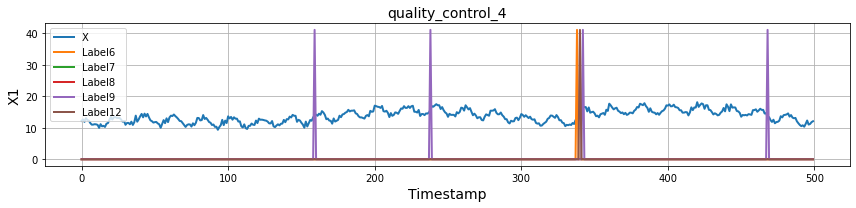

***********************************************************************************


***********************************************************************************


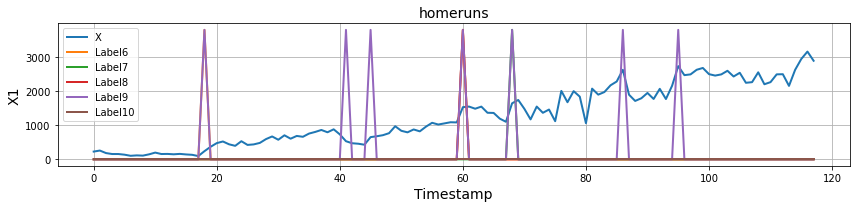

***********************************************************************************


***********************************************************************************


***********************************************************************************


***********************************************************************************


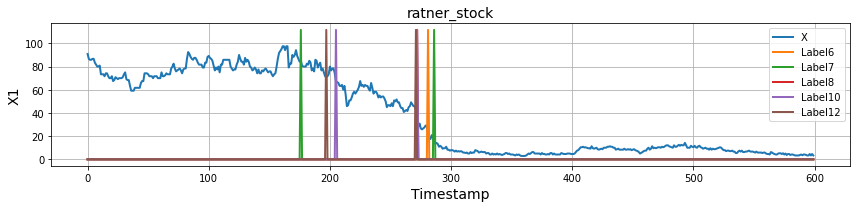

***********************************************************************************


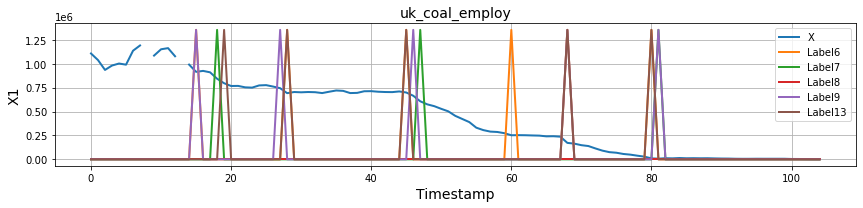

***********************************************************************************


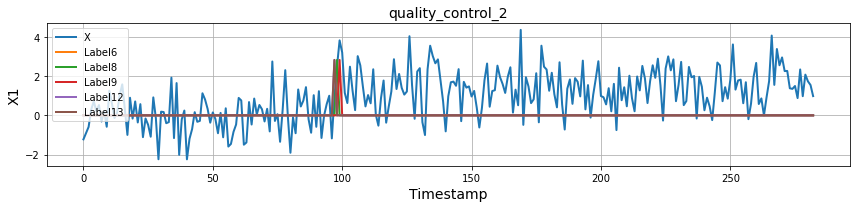

***********************************************************************************


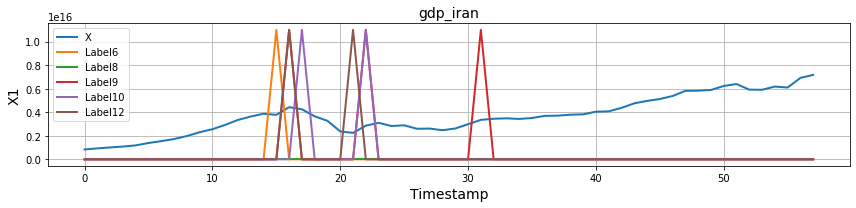

***********************************************************************************


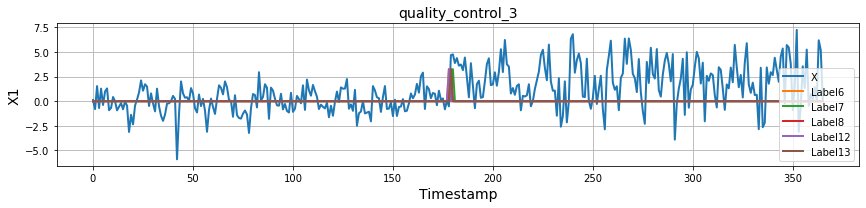

***********************************************************************************


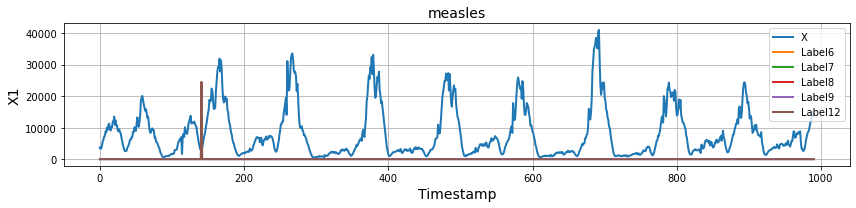

***********************************************************************************


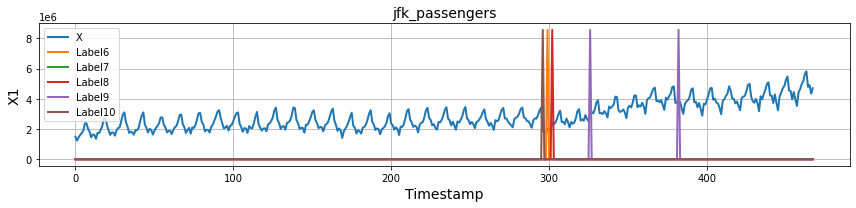

***********************************************************************************


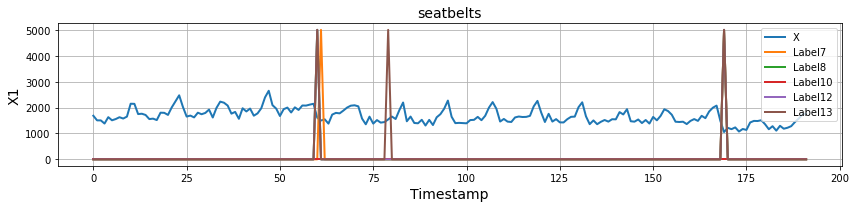

***********************************************************************************


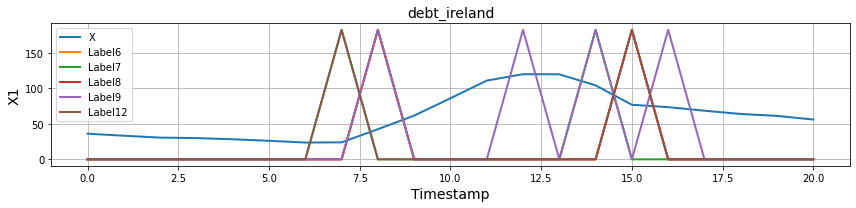

***********************************************************************************


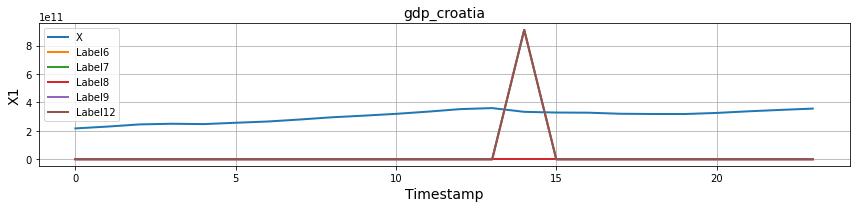

***********************************************************************************


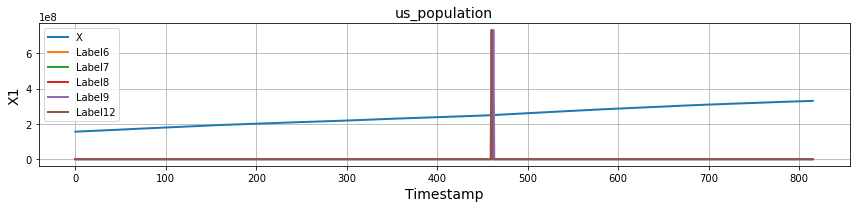

***********************************************************************************


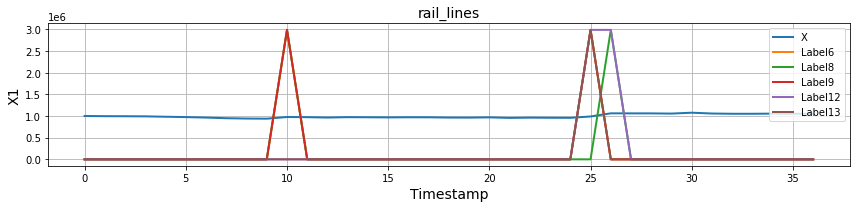

***********************************************************************************


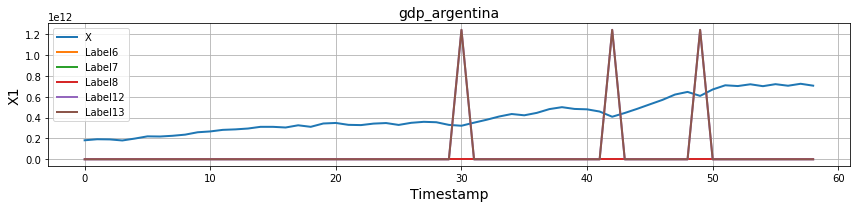

***********************************************************************************


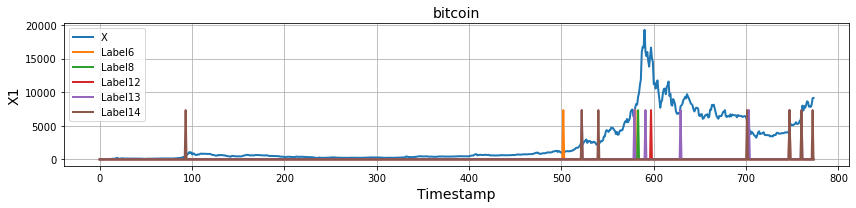

***********************************************************************************


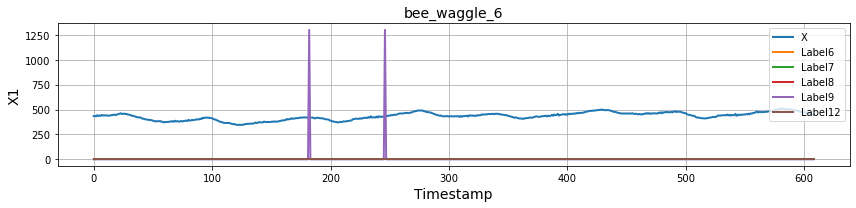

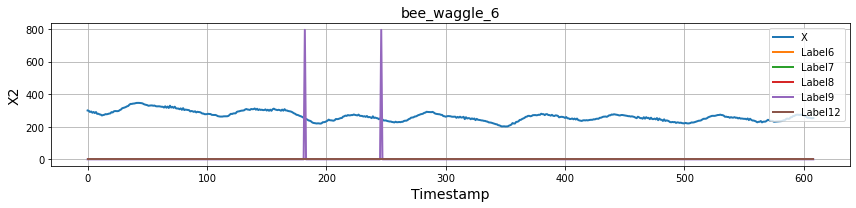

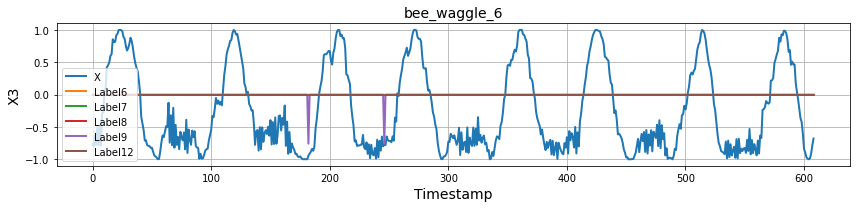

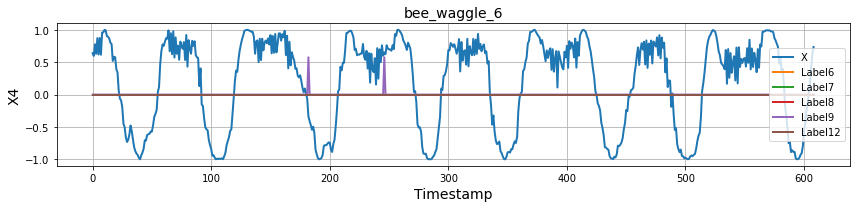

***********************************************************************************


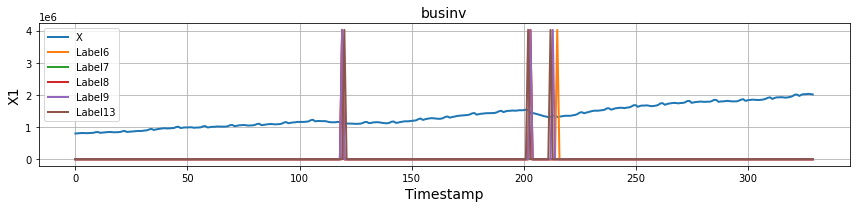

***********************************************************************************


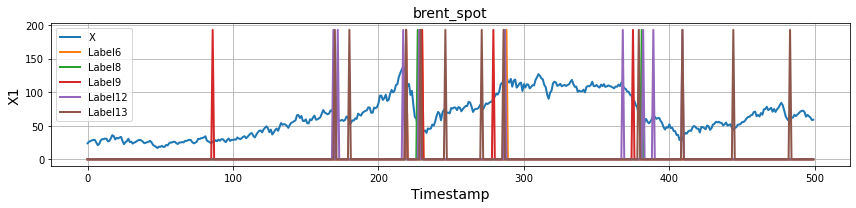

***********************************************************************************


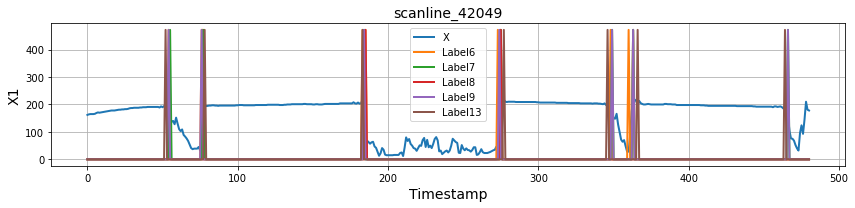

***********************************************************************************


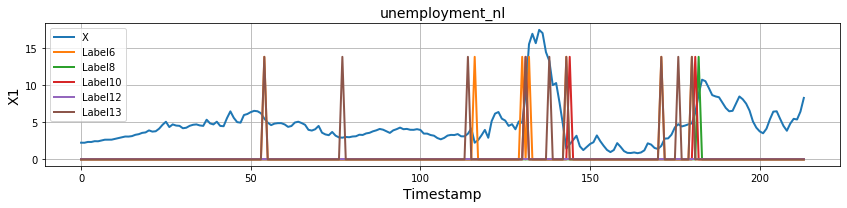

***********************************************************************************


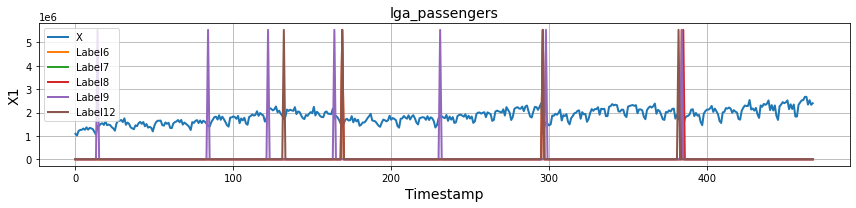

***********************************************************************************


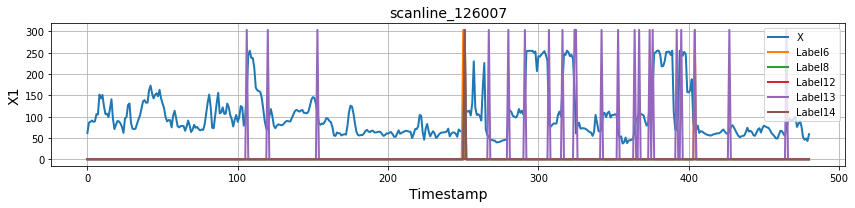

***********************************************************************************


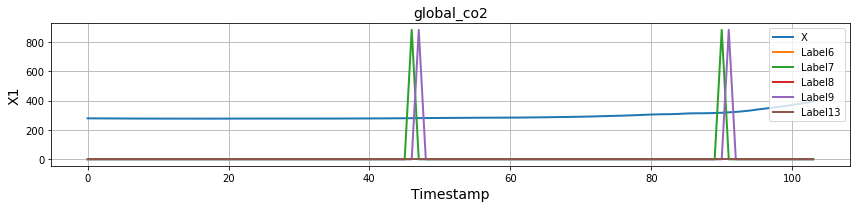

***********************************************************************************


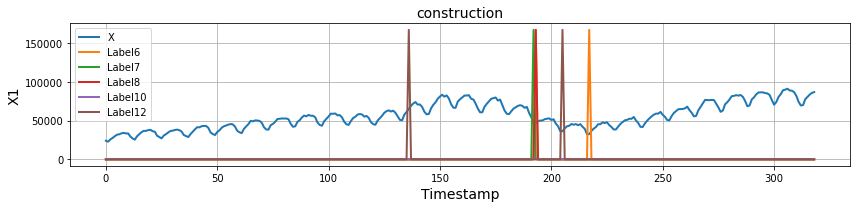

***********************************************************************************


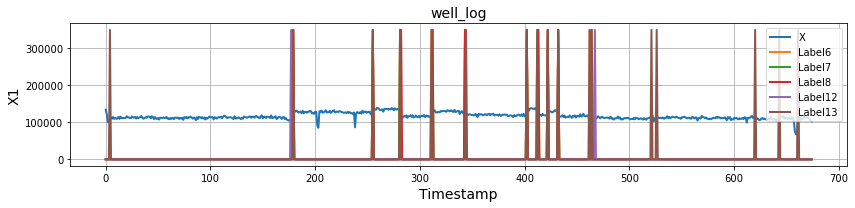

***********************************************************************************


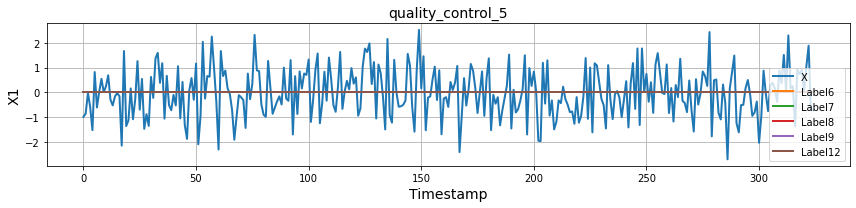

***********************************************************************************


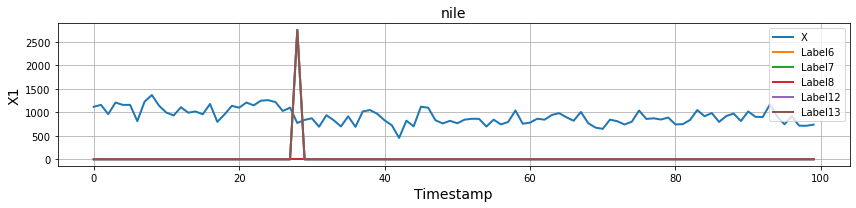

***********************************************************************************


***********************************************************************************


***********************************************************************************


***********************************************************************************


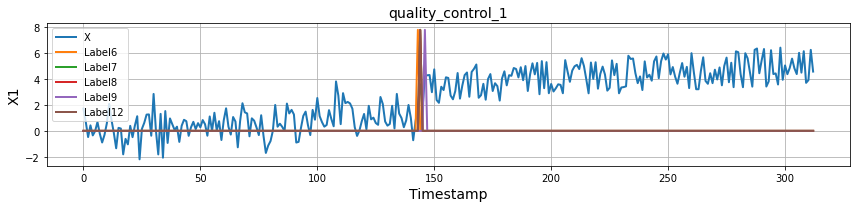

***********************************************************************************


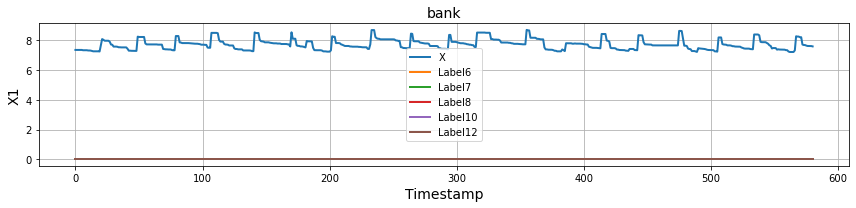

***********************************************************************************


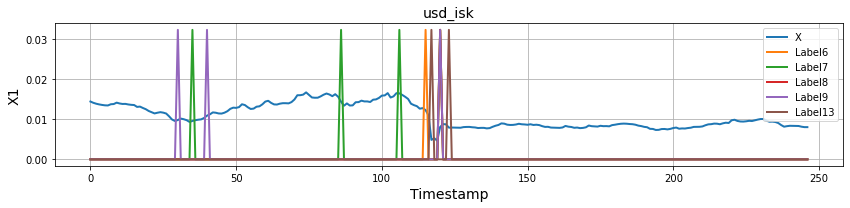

***********************************************************************************


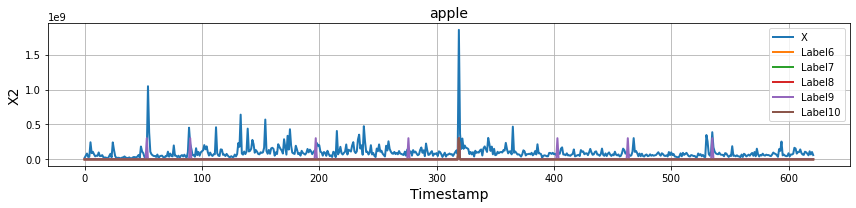

***********************************************************************************


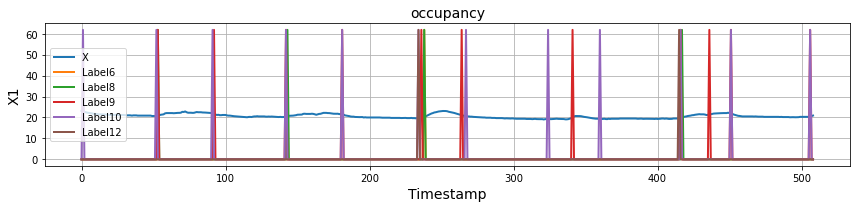

***********************************************************************************


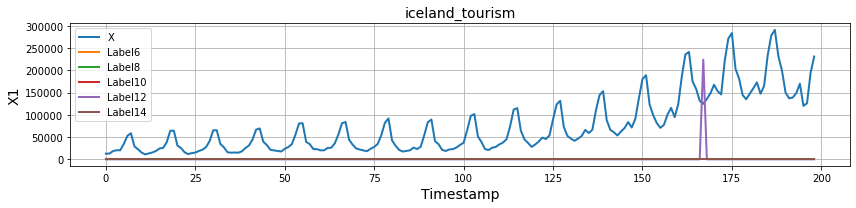

***********************************************************************************


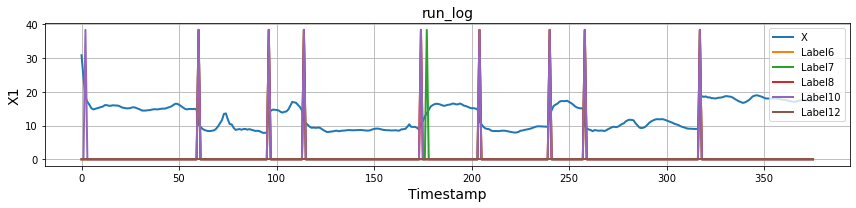

***********************************************************************************


In [27]:
import os

for dataset_name in os.listdir(TCPD_DIR):
    df = tcpd(dataset_name)
    if UPDATE_DATASETS: df.to_csv(f"{DATA_DIR}/{dataset_name}.csv", index=False)
    # Display test sample
    for i in range(len([col for col in df.columns if 'X' in col])):
        plt.figure(figsize=(12, 3.))
        plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
        for label_col in [col for col in df.columns if 'Label' in col]:
            plt.plot(df["Time"], df[label_col]*df[f'X{i+1}'].mean()*3, linewidth=2, label=label_col)
        plt.xlabel('Timestamp', size=14)
        plt.ylabel('X'+str(i+1), size=14)
        plt.grid(b=1)
        plt.title(dataset_name, size=14)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    print('***********************************************************************************')